## GeekBrains. Введение в высшую математику
## Тема “Аналитическая геометрия” и “Графики на плоскости”

### 1. Задание (на листочке)
#### Решите уравнение
#### sin(x)/x=0.

### Решение:

Область определения функции: х != 0

sin(x) = 0

x = pi * n (n != 0)

### 2. Задание (на листочке)
#### Даны три прямые y=k1*x+b1, y=k2*x+b2, y=k3*x+b3.
#### Как узнать, пересекаются они в одной точке или нет?

### Решение:

Необходимым и достаточным условием того, что прямые, определенные на плоскости, в принципе (хоть где-то) пересекаются, является различие их углов наклона, то есть abs(k1) != abs(k2) != abs(k3) != abs(k1)

Если вышеуказанное условие выполнено, то каждая пара прямых пересекается, и для каждой пары прямых существует только одна точка пересечения. Следовательно, для ответа на вопрос, необходимо сравнить точки пересечения первой и второй, и первой и третьей прямой.Так как на прямой одному х соответствует только один y и наоборот, достаточно будет получить одинаковые ответы для любой из координат.

Пересечению прямых y = k1 * x + b1 и y = k2 * x + b2 очевидно соответствует x = -(b2 - b1)/(k2 - k1)
Все три прямые будут пересекаться в одной точке если:
(b2 - b1)/(k2- k1) == (b3 - b1)/(k3 - k1) == (b3 - b2)/(k3 - k2)

Одно из трех уравнений будет выполняться автоматически

### 3. Задание (в программе или на листочке)
#### На листе тетради «в линейку» (расстояние между линиями равно а) лежит игла (длиной b).
#### Координаты нижней точки иглы (х,у), игла лежит под углом alfa.
#### Пересекает ли игла линию или нет?

### Решение:

Для начала сместим систему координат так, чтобы координаты нижней точки иглы лежали в первом квандранте, причем точки (0, 0) и (1, 1) определяли нижни левый и верхний правый углы клетки, в которой находится начало иглы. Если какая-та из координат была отрицательной, произойдет соответствующее отражение.

In [119]:
def new_system (a, x0, y0):
    x_new = abs(x0 % a) / a
    y_new = abs(y0 % a) / a
    return x_new, y_new

Затем определим в новой системе координат положение конца иглы:

In [120]:
import numpy as np
def end_points(a, b, alpha, *new_points):
    end_x = new_points[0] + b / a * np.cos(np.radians(alpha))
    end_y = new_points[1] + b / a * np.sin(np.radians(alpha))
    return end_x, end_y

Игла будет пересекать клетку в том случае если координата конца лежит за границами ячейки:

In [121]:
def if_cross(*end_points):
    for end_point in end_points:
        if end_point > 1 or end_point < 0:
            return True
    return False

Теперь сведем все вместе:
   Чтобы поэкспериментировать, можно менять исходные данные в следующей ячейке

In [122]:
a = 2
b = 1
alpha = 60
x0 = 5.8
y0 = 8.9

In [123]:
x_new, y_new = new_system (a, x0, y0)
print(f'x_new = {x_new:.2}, y_new = {y_new:.2}')
end_x, end_y = end_points(a, b, alpha, x_new, y_new)
print(f'end_x = {end_x:.2}, end_y = {end_y:.2}')
print(if_cross(end_x, end_y))

x_new = 0.9, y_new = 0.45
end_x = 1.1, end_y = 0.88
True


### 4. Задание** (задание делать по желанию)
#### Решите аналитически и потом численно (в программе) уравнение, зависящее от параметра а:
#### sin(а*x)=0
#### при условии: 0.01<a<0.02, 100<х<500.
#### Т.е. надо найти решение х как функцию параметра а - построить график x=x(а).
#### Если численным методом не получается найти все ветви решения x(а), то отыщите хотя бы одну.

### Решение:

sin(a*x) = 0

a*x = n * pi, n - целое

x = n * pi / a (a != 0)

100 < n * pi / 0.01 < 500 => 1 < n * pi < 5 => n = 1

100 < n * pi / 0.02 < 500 => 2 < n * pi < 10 => n = 1, n = 2, n = 3

Для n = 2 накладывается дополнительное условие на a:

100 < 2 * pi / a < 500

2 * pi / 500 < a < 2 * pi / 100

In [124]:
print(f'{2*np.pi/500:.3} < a < {2*np.pi/100:.3}')

0.0126 < a < 0.0628


Так как верхняя граница выше изначально заданной, то остается только нижняя.

Для n = 3 накладывается дополнительное условие на a:

100 < 3 * pi / a < 500

3 * pi / 500 < a < 3 * pi / 100

In [125]:
print(f'{3*np.pi/500:.3} < a < {3*np.pi/100:.3}')

0.0188 < a < 0.0942


#### Ответ:
    x = pi/a для всех а в заданном интервале
    
    x = 2*pi/a для всех a > pi / 250 (0.0126)
    
    x = 3*pi/a для всех a > 3 * pi / 500 (0.0188)

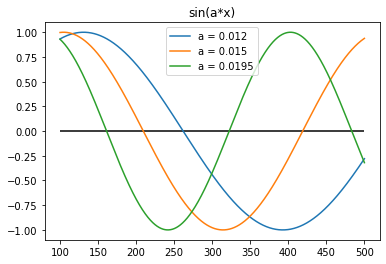

In [126]:
%matplotlib inline
import matplotlib.pyplot as plt

a1 = 0.012
a2 = 0.015
a3 = 0.0195
x = np.linspace(100, 500, 4000)
_ = plt.plot(x, np.sin(a1 * x), label=f'a = {a1}')
_ = plt.plot(x, np.sin(a2 * x), label=f'a = {a2}')
_ = plt.plot(x, np.sin(a3 * x), label=f'a = {a3}')
_ = plt.hlines(0, 100, 500)
_ = plt.legend()
_ = plt.title('sin(a*x)')

На графике видно, что при a = 0.012 существует только один корень, при a = 0.015 уже два, а при a = 0.0195 три.

Можно также построить графики зависимости х от а для различных значений n.
В цикле ниже заданы значения n от -1 до 4. При этом на значения функции (х(а)), выводимых на график, наложены установленные задачей ограничения. Таким образом можно будет увидеть, для каких значений n существуют удовлетворяющие нас зависимости.

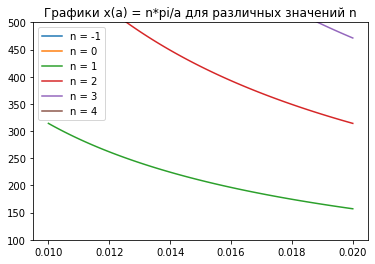

In [127]:
a = np.linspace(0.01, 0.02, 100)
for n in range(-1, 5):
    _ = plt.plot(a, n*np.pi/a, label = f'n = {n}')
_ = plt.ylim(100, 500)
_ = plt.legend()
_ = plt.title('Графики x(a) = n*pi/a для различных значений n')

### 5 Задание
#### Найти угол между прямыми 4y - 3x + 12 = 0 и 7y + x - 14 = 0

### Решение:

tg(a) = (A2B1 - A1B2)/(A1A2 + B1B2)

In [128]:
A1 = -3
B1 = 4
A2 = 1
B2 = 7
print(f'Угол между этими прямыми равен: {abs(np.degrees(np.arctan((A2*B1 - A1*B2)/(A1*A2 - B1*B2)))):.3} градусов')

Угол между этими прямыми равен: 38.9 градусов


#### Найти угол между прямыми x = qrt(2) и x = -sqrt(3)

### Ответ:
Прямые параллельны. Угол равен 0.

### 6 Задание
#### Выяснить тип кривых второго порядка, порожденных следующими уравнениями:

#### y^2 - 2*x - 2*y - 5 = 0

y^2 - 2x - 2y - 5 = y^2 - 2y + 1 - 1 - 2x - 5 = (y-1)^2 - 2*(x - (-3))  Парабола

#### 3*x^2 + 5*y^2 + 12*x -30*y +42 = 0

    3x^2 + 12x = 3(x^2 + 4x + 4 - 4) = 3(x + 2)^2 - 12

    5y^2 - 30y = 5(y^2 - 6y + 9 - 9) = 5(y - 3)^2 - 45

    f = 3(x + 2)^2 - 12 + 5(y - 3)^2 - 45 + 42 = 3(x + 2)^2 + 5(y - 3)^2 - 15

(x + 2)^2/5 + (y - 3)^2/3 = 1 Эллипс

####   2*x^2 - y^2 + 6*y - 7 = 0

    -y^2 + 6y = -(y^2 - 6y + 9 - 9) = -(y - 3)^2 + 9

    f = 2x^2 - (y -3)^2 + 9 - 7 = 2x^2 - (y -3)^2 + 2

(y -3)^2/2 - x^2/1 = 1 Гипербола с осью симметрии y = 0

#### 2*x^2 - 3*y^2 - 28*x - 42*y - 55 = 0

    2x^2 - 28x = 2(x^2 -14x + 49 - 49) = 2(x - 7)^2 - 98 

    -3y^2 -42y = -3(y^2 + 14y + 49 - 49) = -3(y + 7) + 147

    f = 2(x - 7)^2 - 98 - 3(y + 7)^2 + 147 - 55 = 2(x - 7)^2 - 3(y + 7)^2 - 6

(x - 7)^2/3 - (y + 7)^2/2 = 1 Гипербола